In [14]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
from pathlib import Path

In [3]:

# URL of the CSV file to download
url = "https://raw.githubusercontent.com/hseju/British-Airways-Good-or-Bad/main/Predictive%20Modeling/customer_booking.csv"

# Get the user's Desktop directory
desktop_directory = os.path.join(Path.home(), "Desktop")

# Specify the local file path
local_file_path = os.path.join(desktop_directory, "customer_booking.csv")

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Write the content to the local file
    with open(local_file_path, "wb") as file:
        file.write(response.content)
    print(f"File '{local_file_path}' downloaded successfully.")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")


File '/Users/leoking/Desktop/customer_booking.csv' downloaded successfully.


In [36]:
df = pd.read_csv("/Users/leoking/Desktop/customer_booking.csv", encoding='ISO-8859-1')
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [12]:
per_internet = df.sales_channel.value_counts().values[0] / df.sales_channel.count() * 100
per_mobile = df.sales_channel.value_counts().values[1] / df.sales_channel.count() * 100

print(f"Number of booking done through internet : {per_internet}%")
print(f"Number of booking done through phone call: {per_mobile}%")

Number of booking done through internet : 88.764%
Number of booking done through phone call: 11.236%


# trip type 

In [13]:
per_round = df.trip_type.value_counts().values[0]/ df.trip_type.count() *100
per_oneway = df.trip_type.value_counts().values[1] / df.trip_type.count() *100
per_circle = df.trip_type.value_counts().values[2] / df.trip_type.count() * 100

print(f"Percentage of round trips: {per_round}%")
print(f"Percentage of one way trips: {per_oneway}%")
print(f"Percentage of circle trips: {per_circle}%")


Percentage of round trips: 98.994%
Percentage of one way trips: 0.774%
Percentage of circle trips: 0.232%


# purchase leads

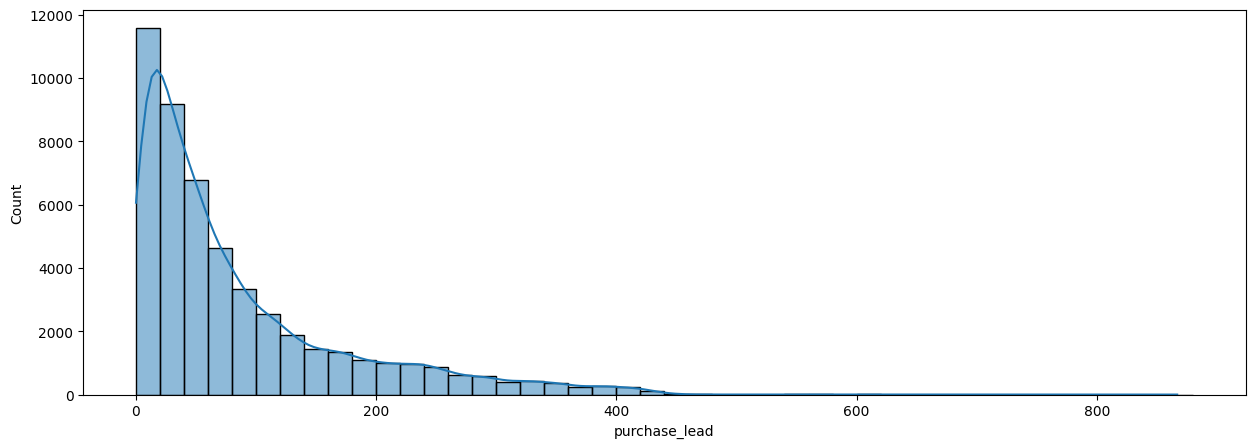

In [16]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x="purchase_lead", binwidth=20, kde=True)
plt.show()

In [17]:
(df.purchase_lead>600).value_counts()

purchase_lead
False    49992
True         8
Name: count, dtype: int64

removing entries with purchase_lead more 600 days

In [18]:
df[df.purchase_lead>600]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
835,3,Internet,RoundTrip,641,46,6,Sun,AKLKUL,Malaysia,1,0,1,8.83,1
6148,1,Internet,RoundTrip,614,19,11,Wed,COKMEL,Australia,0,0,0,8.83,0
24119,1,Internet,RoundTrip,704,23,8,Tue,PNHSYD,Australia,0,0,0,8.58,0
38356,2,Internet,RoundTrip,633,5,10,Sat,HKTOOL,Australia,0,0,1,8.83,0
39417,1,Mobile,RoundTrip,625,5,15,Fri,ICNRGN,Myanmar (Burma),0,0,0,6.62,0
42916,1,Mobile,RoundTrip,605,6,18,Thu,BLRMEL,India,0,0,0,8.83,0
46716,2,Internet,RoundTrip,606,6,6,Fri,HKTTPE,United States,0,0,1,4.67,0
48259,3,Internet,RoundTrip,867,6,7,Mon,KIXMLE,Japan,0,0,1,7.00,1


how long are they staying 

<Axes: xlabel='length_of_stay', ylabel='Count'>

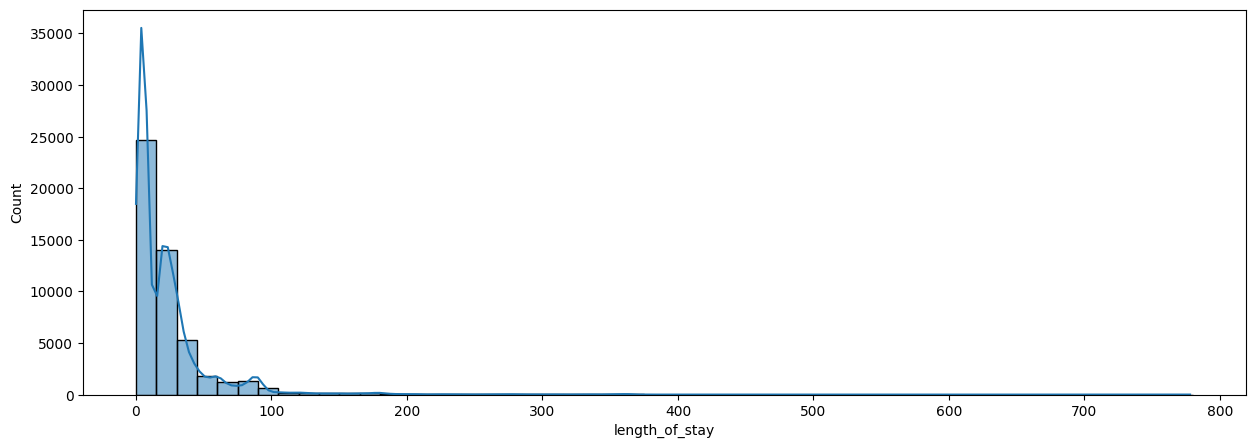

In [21]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="length_of_stay",binwidth=15,kde=True)

In [ ]:
#we can also see those who exceed a 100days

In [22]:
(df.length_of_stay>200).value_counts()

length_of_stay
False    49721
True       279
Name: count, dtype: int64

In [38]:
#checking for flight days
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7
}
df.flight_day = df.flight_day.map(mapping)

In [39]:
df.flight_day.value_counts()

flight_day
1    8102
3    7674
2    7673
4    7424
5    6761
7    6554
6    5812
Name: count, dtype: int64

Text(0, 0.5, 'Number of bookings')

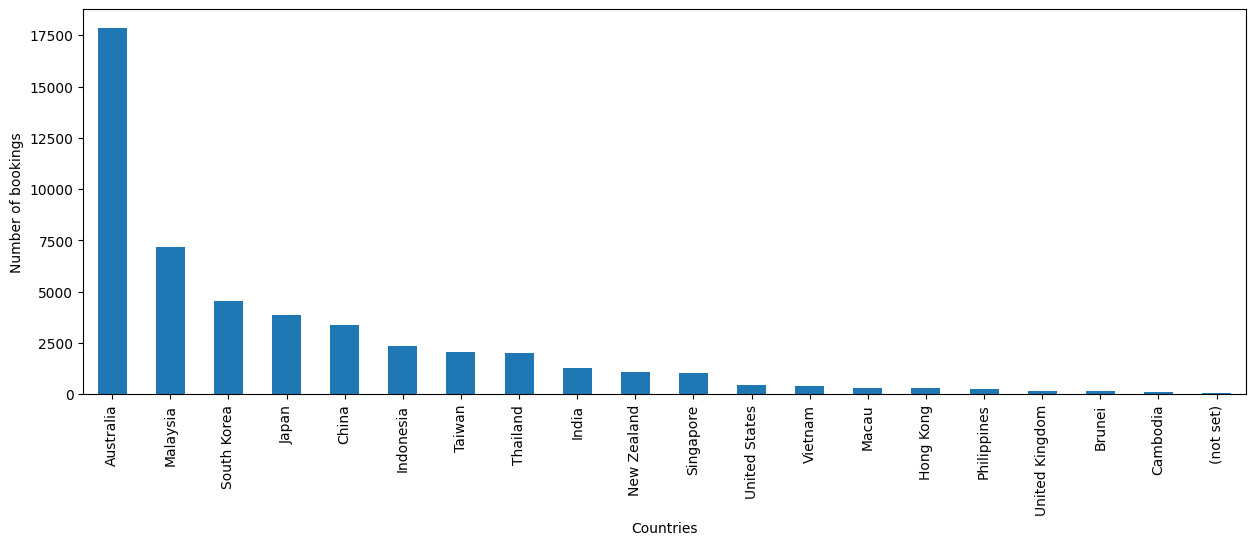

In [37]:
#booking origin

plt.figure(figsize=(15,5))
ax = df.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")

Text(0, 0.5, 'Number of bookings')

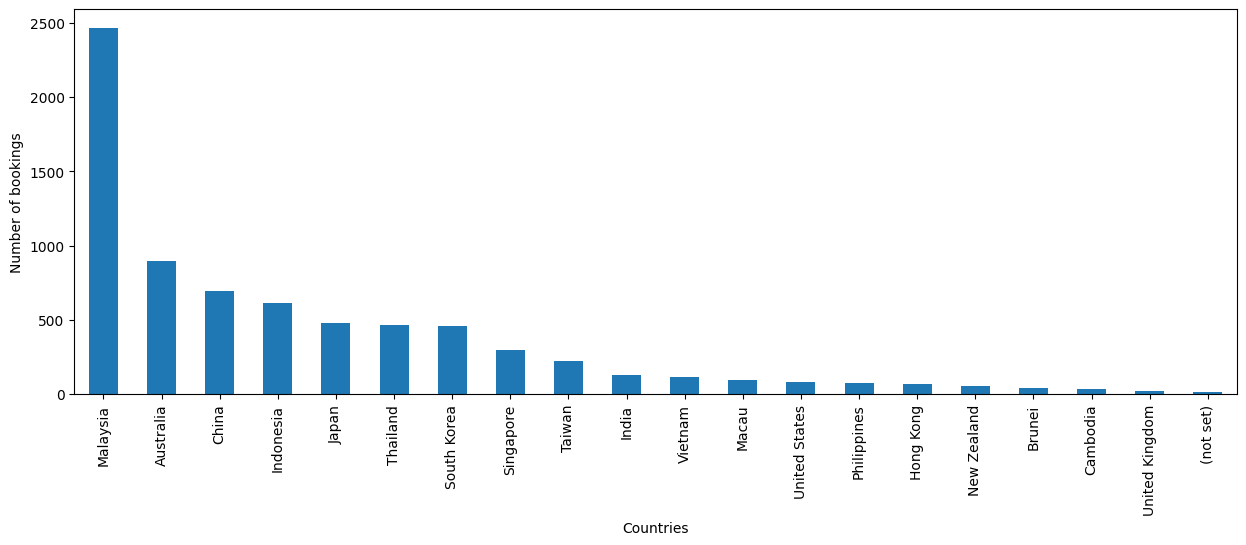

In [40]:
#now let check for customer who complete their booking .
plt.figure(figsize=(15,5))
ax = df[df.booking_complete==1].booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")

In [42]:
successful_booking= df.booking_complete.value_counts().values[0]/len(df) * 100
successful_booking

85.044

In [43]:
unsucessful_booking =100-successful_booking
unsucessful_booking

14.956000000000003

In [44]:
print(f"out of 50000 booking entries only{round(unsucessful_booking,2)}% booking were successful")

out of 50000 booking entries only14.96% booking were successful


In [45]:
# Replace 'your_data_frame' with the actual name of your DataFrame
df.to_csv('/Users/leoking/Desktop/filtered.csv', index=False)
